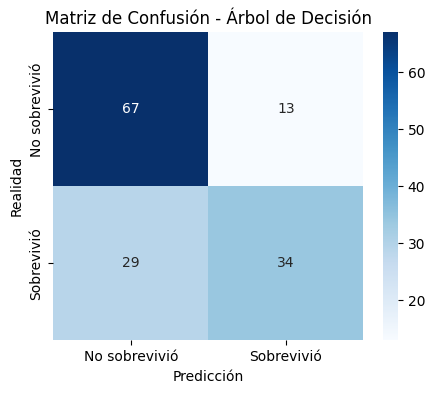

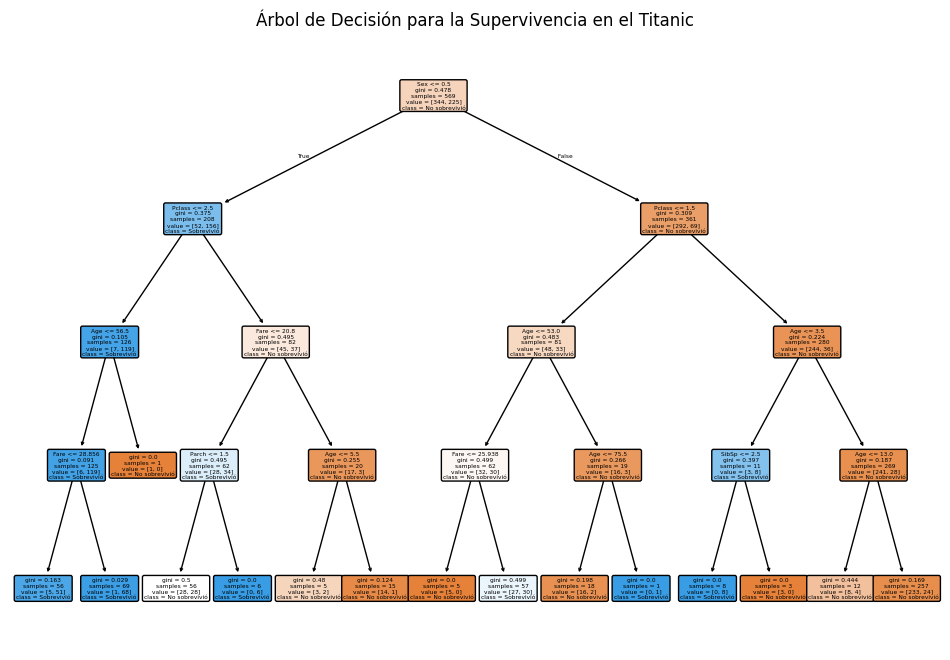

(0.7062937062937062, 0.723404255319149, 0.5396825396825397, 0.6181818181818182)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

#url = https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
path = "DataSet/train.csv"
df = pd.read_csv(path)

df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].dropna()

le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])

le_embarked = LabelEncoder()
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])

X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.show()

plt.figure(figsize=(12,8))
plot_tree(model, feature_names=X.columns, class_names=["No sobrevivió", "Sobrevivió"], filled=True, rounded=True)
plt.title("Árbol de Decisión para la Supervivencia en el Titanic")
plt.show()

accuracy, precision, recall, f1

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Árbol de Decisión": DecisionTreeClassifier(max_depth=4, random_state=42),
    "Regresión Logística": LogisticRegression(max_iter=1000, random_state=42),
    "Naïve Bayes": GaussianNB(),
    "SGD": SGDClassifier(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[name] = [accuracy, precision, recall, f1]

df_results = pd.DataFrame(results, index=["Exactitud", "Precisión", "Recall", "F1-Score"])
df_results

,Árbol de Decisión,Regresión Logística,Naïve Bayes,SGD,KNN
Exactitud,0.706294,0.797203,0.762238,0.671329,0.685315
Precisión,0.723404,0.854167,0.730159,0.600000,0.628571
Recall,0.539683,0.650794,0.730159,0.761905,0.698413
F1-Score,0.618182,0.738739,0.730159,0.671329,0.661654


In [ ]:
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].dropna()

df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ]

df_results = pd.DataFrame(results, index=["Exactitud", "Precisión", "Recall", "F1-Score"])
df_results

,Árbol de Decisión,Regresión Logística,Naïve Bayes,SGD,KNN
Exactitud,0.706294,0.797203,0.762238,0.671329,0.685315
Precisión,0.723404,0.854167,0.730159,0.600000,0.628571
Recall,0.539683,0.650794,0.730159,0.761905,0.698413
F1-Score,0.618182,0.738739,0.730159,0.671329,0.661654
